# Pratical-28 Text Classification Project

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r"F:\DSEU ALL SUBJECTS FOLDER AND IMAGES\SEMESTER-3\Machine learning ----[[SEM-3]]\ML_All_Data\spam.csv",encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


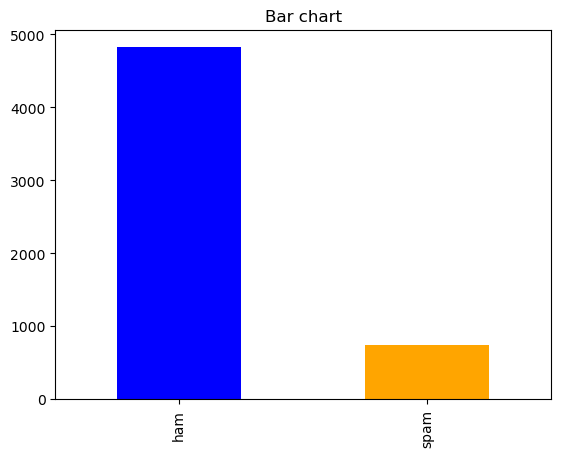

In [3]:
# Visualize Distribution of Messages using Bar Chart
count_Class=pd.value_counts(df["v1"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

In [4]:
# Spam and Ham Message
# Mapping label column to integer 0 -> ham and 1 -> spam
df['v1'] = df.v1.map({'ham':0, 'spam':1})
print(df.shape)
df.head()

(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['v2'],
 df['v1'],
random_state=1)
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


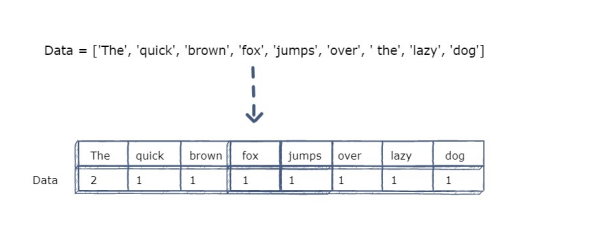

In [6]:
from IPython import display
display.Image(r"F:\DSEU ALL SUBJECTS FOLDER AND IMAGES\SEMESTER-3\Machine learning ----[[SEM-3]]\iamge_ml.png")


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()
# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)
# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [8]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)


MultinomialNB()

In [9]:
predictions = naive_bayes.predict(testing_data)


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.9856424982053122
Precision score:  0.9545454545454546
Recall score:  0.9333333333333333
F1 score:  0.9438202247191012


In [11]:
messages = ["Congragulations! You have won a $10,000. Go to https://bit.ly/23343 to claim now.",
 "Nah I don't think he goes to usf, he lives around here though",
 "Get $10 Amazon Gift Voucher on Completing the Demo:- va.pcb3.in/ click this link to claim now",
 "You have won a $500. Please register your account today itself to claim now https://imp.com",
 "Please dont respond to missed calls from unknown international numbers Call/ SMS on winning prize. lottery as this may be fraud"]
message_transformed = count_vector.transform(messages)
new_prediction = naive_bayes.predict(message_transformed)
for i in range(len(new_prediction)):
 if new_prediction[i] == 0:
     print("Ham.")
 else:
     print("Spam.")

Spam.
Ham.
Spam.
Spam.
Spam.
